# Milestone #1

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("2022_Yellow_Taxi_Trip_Data_20240305.csv")

In [5]:
df

,tpep_pickup_datetime,passenger_count,trip_distance,payment_type,fare_amount
0,04/18/2023 02:30:05 PM,1.0,0.93,1,52.0
1,01/01/2023 12:31:23 AM,1.0,3.06,1,15.6
2,01/01/2023 12:05:11 AM,1.0,3.62,1,28.9
3,01/01/2023 12:03:33 AM,6.0,1.19,1,10.0
4,01/01/2023 12:01:43 AM,1.0,0.16,1,12.0
...,...,...,...,...,...
39656093,01/01/2001 01:52:48 AM,1.0,6.95,1,22.0
39656094,01/01/2001 01:23:51 AM,1.0,4.68,2,20.5
39656095,01/01/2001 01:02:18 AM,1.0,3.10,1,14.0
39656096,01/01/2001 12:27:45 AM,1.0,0.88,2,6.0


In [7]:
df2 = df
df2.dtypes

tpep_pickup_datetime     object
passenger_count         float64
trip_distance           float64
payment_type              int64
fare_amount             float64
dtype: object

In [9]:
df2["tpep_pickup_datetime"] = pd.to_datetime(df2["tpep_pickup_datetime"], format="%m/%d/%Y %I:%M:%S %p")

In [11]:
df2.dtypes
df2

,tpep_pickup_datetime,passenger_count,trip_distance,payment_type,fare_amount
0,2023-04-18 14:30:05,1.0,0.93,1,52.0
1,2023-01-01 00:31:23,1.0,3.06,1,15.6
2,2023-01-01 00:05:11,1.0,3.62,1,28.9
3,2023-01-01 00:03:33,6.0,1.19,1,10.0
4,2023-01-01 00:01:43,1.0,0.16,1,12.0
...,...,...,...,...,...
39656093,2001-01-01 01:52:48,1.0,6.95,1,22.0
39656094,2001-01-01 01:23:51,1.0,4.68,2,20.5
39656095,2001-01-01 01:02:18,1.0,3.10,1,14.0
39656096,2001-01-01 00:27:45,1.0,0.88,2,6.0


## Filter the data to work with a smaller df

In [13]:
filter_2022 = df2["tpep_pickup_datetime"].dt.year == 2022
filter_june = df2["tpep_pickup_datetime"].dt.month == 6
filter_day04 = df2["tpep_pickup_datetime"].dt.day == 4

df3 = df2[filter_2022 & filter_june & filter_day04]

# Step 5: cleaning your data

#### fare_amount column have negative numbers and a 6999 row fare which looks like a error

In [15]:
df3.sort_values("fare_amount", ascending = False)

,tpep_pickup_datetime,passenger_count,trip_distance,payment_type,fare_amount
22987864,2022-06-04 11:45:57,4.0,14.80,2,6999.0
22974936,2022-06-04 13:37:38,2.0,0.00,2,450.0
23013339,2022-06-04 02:21:40,1.0,0.00,2,345.0
22931482,2022-06-04 19:22:56,1.0,95.68,2,340.0
22913402,2022-06-04 22:05:44,2.0,47.40,1,300.0
...,...,...,...,...,...
22999009,2022-06-04 09:44:07,1.0,0.00,4,-100.0
22988214,2022-06-04 11:42:57,4.0,46.32,2,-198.0
22987269,2022-06-04 11:51:23,1.0,0.00,4,-250.0
23007213,2022-06-04 06:04:52,3.0,73.86,2,-284.0


In [17]:
def fare_error(x):
    if x > 450:
        return 1
    elif x <= 0:
        return 1
    else:
        return 0

In [19]:
df3["fare_error"] = df3["fare_amount"].apply(fare_error)

/tmp/ipykernel_308/2281713896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["fare_error"] = df3["fare_amount"].apply(fare_error)


In [21]:
df3.sort_values("fare_amount", ascending = False)

,tpep_pickup_datetime,passenger_count,trip_distance,payment_type,fare_amount,fare_error
22987864,2022-06-04 11:45:57,4.0,14.80,2,6999.0,1
22974936,2022-06-04 13:37:38,2.0,0.00,2,450.0,0
23013339,2022-06-04 02:21:40,1.0,0.00,2,345.0,0
22931482,2022-06-04 19:22:56,1.0,95.68,2,340.0,0
22913402,2022-06-04 22:05:44,2.0,47.40,1,300.0,0
...,...,...,...,...,...,...
22999009,2022-06-04 09:44:07,1.0,0.00,4,-100.0,1
22988214,2022-06-04 11:42:57,4.0,46.32,2,-198.0,1
22987269,2022-06-04 11:51:23,1.0,0.00,4,-250.0,1
23007213,2022-06-04 06:04:52,3.0,73.86,2,-284.0,1


In [23]:
df4 = df3.drop(df3[df3['fare_error'] == 1].index)


In [25]:
df4.sort_values("fare_amount").head(10)

,tpep_pickup_datetime,passenger_count,trip_distance,payment_type,fare_amount,fare_error
22937414,2022-06-04 18:38:36,1.0,0.0,1,0.01,0
23008474,2022-06-04 04:26:13,1.0,0.0,2,0.01,0
22985399,2022-06-04 12:08:17,2.0,5.2,3,0.01,0
22978393,2022-06-04 13:08:33,1.0,0.0,3,0.01,0
23011794,2022-06-04 02:50:37,1.0,0.0,2,0.01,0
23019027,2022-06-04 00:55:36,1.0,1.0,3,0.01,0
22955889,2022-06-04 16:16:32,1.0,0.0,1,0.01,0
22937509,2022-06-04 18:37:58,4.0,0.1,4,0.01,0
22995046,2022-06-04 10:33:10,0.0,27.2,2,0.01,0
23016515,2022-06-04 01:30:26,1.0,0.0,3,0.01,0


### The minimum fare is $2.50

In [27]:
df5 = df4.drop(df4[df4['fare_amount'] < 2.50 ].index)


In [29]:
df5.sort_values("fare_amount").head(10)

,tpep_pickup_datetime,passenger_count,trip_distance,payment_type,fare_amount,fare_error
22942380,2022-06-04 18:01:57,0.0,0.00,3,2.5,0
22962935,2022-06-04 15:17:36,1.0,0.00,4,2.5,0
22994842,2022-06-04 10:35:38,0.0,0.00,2,2.5,0
23007583,2022-06-04 05:34:22,6.0,0.02,2,2.5,0
22993588,2022-06-04 10:49:04,0.0,0.00,2,2.5,0
22909910,2022-06-04 22:38:38,1.0,0.11,2,2.5,0
22981745,2022-06-04 12:40:12,1.0,0.00,2,2.5,0
22951466,2022-06-04 16:51:45,1.0,0.07,2,2.5,0
22936764,2022-06-04 18:43:25,1.0,0.03,1,2.5,0
23007578,2022-06-04 05:35:01,1.0,0.00,1,2.5,0


### Clean the trip distance

In [31]:
df5.sort_values("trip_distance", ascending = False)

,tpep_pickup_datetime,passenger_count,trip_distance,payment_type,fare_amount,fare_error
22975404,2022-06-04 13:34:00,NaN,133958.45,0,20.86,0
22913712,2022-06-04 22:03:00,NaN,47220.34,0,10.30,0
22981521,2022-06-04 12:42:00,NaN,21756.70,0,10.00,0
22931482,2022-06-04 19:22:56,1.0,95.68,2,340.00,0
22975583,2022-06-04 13:32:25,1.0,87.89,1,160.00,0
...,...,...,...,...,...,...
22984318,2022-06-04 12:17:54,1.0,0.00,1,2.50,0
22919395,2022-06-04 21:11:02,1.0,0.00,2,2.50,0
23010751,2022-06-04 03:13:55,1.0,0.00,1,75.00,0
23010750,2022-06-04 03:13:58,1.0,0.00,1,2.50,0


### Set a distance minimun of 0.5 miles

In [33]:
df5 = df5.drop(df5[df5['trip_distance'] < 0.5 ].index)
df5 = df5.drop(df5[df5['trip_distance'] >100 ].index)


In [35]:
df5.sort_values("trip_distance", ascending = False)

,tpep_pickup_datetime,passenger_count,trip_distance,payment_type,fare_amount,fare_error
22931482,2022-06-04 19:22:56,1.0,95.68,2,340.0,0
22975583,2022-06-04 13:32:25,1.0,87.89,1,160.0,0
23007214,2022-06-04 06:04:52,3.0,73.86,2,284.0,0
22913600,2022-06-04 22:03:57,1.0,59.00,1,283.0,0
22907937,2022-06-04 22:56:20,0.0,54.20,2,144.0,0
...,...,...,...,...,...,...
22984004,2022-06-04 12:20:28,3.0,0.50,1,6.0,0
22968407,2022-06-04 14:32:49,2.0,0.50,1,4.0,0
22956885,2022-06-04 16:08:22,1.0,0.50,2,4.5,0
22913888,2022-06-04 22:01:26,1.0,0.50,1,5.0,0


### Clean passenger_count

In [37]:
df5.sort_values("passenger_count")

,tpep_pickup_datetime,passenger_count,trip_distance,payment_type,fare_amount,fare_error
22924262,2022-06-04 20:24:03,0.0,3.00,1,13.00,0
22928800,2022-06-04 19:43:39,0.0,0.80,1,6.00,0
22906827,2022-06-04 23:06:26,0.0,1.40,1,6.50,0
23001260,2022-06-04 09:08:44,0.0,1.90,2,8.50,0
23005561,2022-06-04 07:23:46,0.0,2.00,1,7.50,0
...,...,...,...,...,...,...
23023814,2022-06-04 00:01:11,NaN,16.55,0,53.05,0
23023834,2022-06-04 00:01:00,NaN,2.57,0,15.19,0
23023835,2022-06-04 00:01:00,NaN,3.58,0,19.82,0
23023867,2022-06-04 00:00:41,NaN,3.50,0,17.95,0


In [39]:
missing_rows = df5["passenger_count"].isna()
df5[missing_rows]

,tpep_pickup_datetime,passenger_count,trip_distance,payment_type,fare_amount,fare_error
22901413,2022-06-04 23:59:33,NaN,1.98,0,11.66,0
22901423,2022-06-04 23:59:27,NaN,6.15,0,26.33,0
22901444,2022-06-04 23:59:12,NaN,5.96,0,26.65,0
22901445,2022-06-04 23:59:12,NaN,1.91,0,13.38,0
22901458,2022-06-04 23:59:00,NaN,2.56,0,13.63,0
...,...,...,...,...,...,...
23023814,2022-06-04 00:01:11,NaN,16.55,0,53.05,0
23023834,2022-06-04 00:01:00,NaN,2.57,0,15.19,0
23023835,2022-06-04 00:01:00,NaN,3.58,0,19.82,0
23023867,2022-06-04 00:00:41,NaN,3.50,0,17.95,0


In [41]:
df5 = df5[~missing_rows]
df5.sort_values("passenger_count")

,tpep_pickup_datetime,passenger_count,trip_distance,payment_type,fare_amount,fare_error
22924262,2022-06-04 20:24:03,0.0,3.00,1,13.0,0
22928800,2022-06-04 19:43:39,0.0,0.80,1,6.0,0
22906827,2022-06-04 23:06:26,0.0,1.40,1,6.5,0
23001260,2022-06-04 09:08:44,0.0,1.90,2,8.5,0
23005561,2022-06-04 07:23:46,0.0,2.00,1,7.5,0
...,...,...,...,...,...,...
23013498,2022-06-04 02:19:00,6.0,2.63,2,9.5,0
22929974,2022-06-04 19:34:23,6.0,10.50,1,32.0,0
22946271,2022-06-04 17:32:48,6.0,1.62,2,7.5,0
23007289,2022-06-04 05:59:06,6.0,4.30,1,15.5,0


In [43]:
df5 = df5.drop(df5[df5['passenger_count'] < 1 ].index)

In [45]:
df5.sort_values("passenger_count")

,tpep_pickup_datetime,passenger_count,trip_distance,payment_type,fare_amount,fare_error
22962368,2022-06-04 15:22:24,1.0,0.68,1,5.0,0
22976703,2022-06-04 13:22:52,1.0,1.75,1,9.0,0
22976702,2022-06-04 13:22:53,1.0,1.80,1,11.5,0
22976700,2022-06-04 13:22:54,1.0,1.56,1,10.5,0
22976698,2022-06-04 13:22:55,1.0,2.30,2,12.0,0
...,...,...,...,...,...,...
22963871,2022-06-04 15:10:15,6.0,3.42,1,17.5,0
23011571,2022-06-04 02:54:47,6.0,1.07,1,6.0,0
22956097,2022-06-04 16:14:53,6.0,1.35,1,8.0,0
22941553,2022-06-04 18:07:40,6.0,1.96,1,9.5,0


### Payment type

#### payment method: 1= Credit card, 2= Cash, 3= No charge, 4= Dispute, 5= Unknown, 6= Voided

# Step 6: single variable distribution plots

In [ ]:
#sns.pairplot(data = df5)

Text(0, 0.5, 'Frequency')

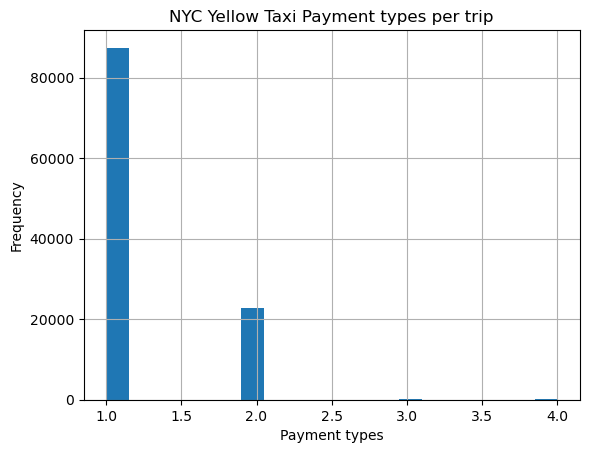

In [47]:
df5["payment_type"].hist(bins=20)
plt.title("NYC Yellow Taxi Payment types per trip")
plt.xlabel("Payment types")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

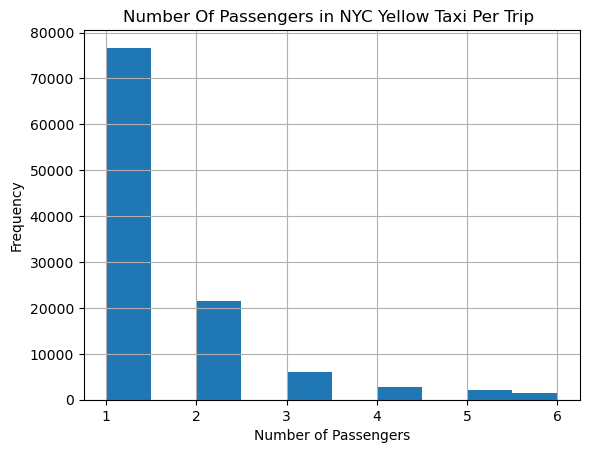

In [49]:
df5["passenger_count"].hist()
plt.title("Number Of Passengers in NYC Yellow Taxi Per Trip ")
plt.xlabel("Number of Passengers")
plt.ylabel("Frequency")

Text(0, 0.5, 'Fare $')

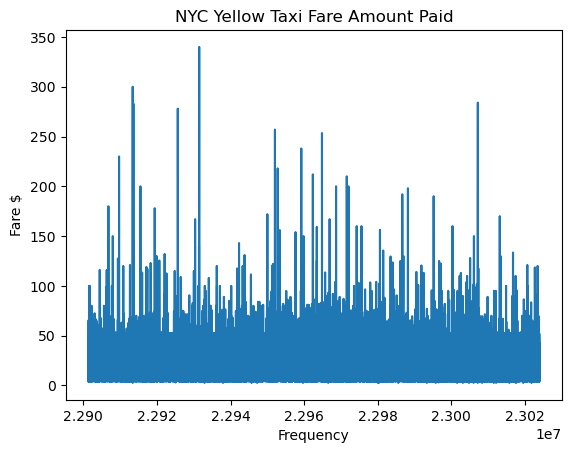

In [51]:
df5["fare_amount"].plot()
plt.title("NYC Yellow Taxi Fare Amount Paid")
plt.xlabel("Frequency")
plt.ylabel("Fare $")

Text(0, 0.5, 'Distance in Miles')

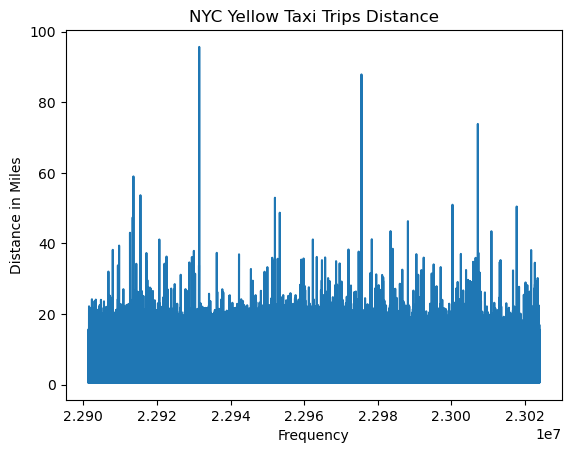

In [53]:
df5["trip_distance"].plot()
plt.title("NYC Yellow Taxi Trips Distance")
plt.xlabel("Frequency")
plt.ylabel("Distance in Miles")

# Step 7: multiple variable plots

Text(0, 0.5, 'Fare Amount $')

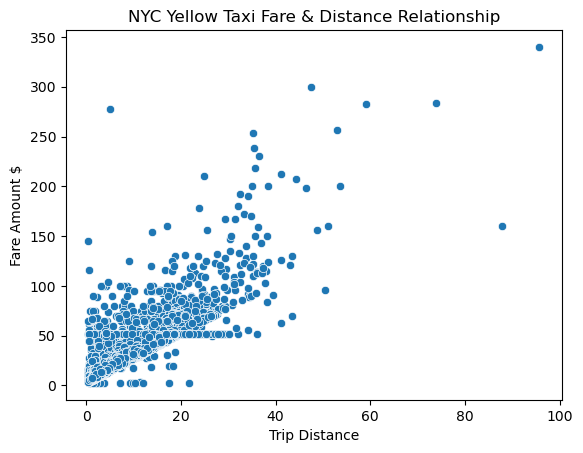

In [55]:
sns.scatterplot(x = "trip_distance", y = "fare_amount", data = df5)
plt.title("NYC Yellow Taxi Fare & Distance Relationship")
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount $")

Text(0, 0.5, 'Fare Amount $')

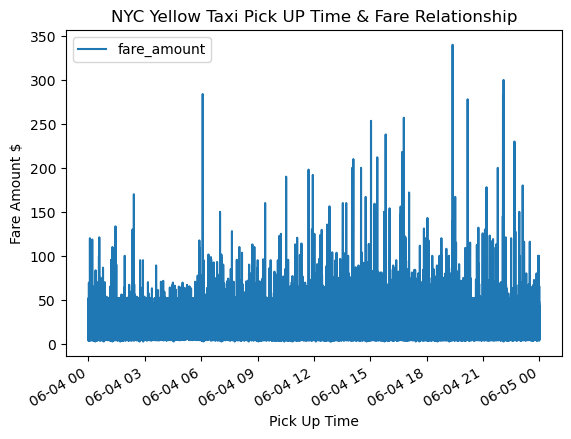

In [57]:
df5.plot(x = "tpep_pickup_datetime", y = "fare_amount")
plt.title("NYC Yellow Taxi Pick UP Time & Fare Relationship")
plt.xlabel("Pick Up Time")
plt.ylabel("Fare Amount $")

# Milestone #2

### Completed in a different file.

# Milestone #3

## Step 10: New analysis

### a. Choose any new data analysis technique that you have not already done as part of your project, and apply it to your data.  Ideas: 

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Decision tree classifiers

### Payment type

#### payment method: 1= Credit card, 2= Cash, 3= No charge, 4= Dispute, 5= Unknown, 6= Voided

In [61]:
df5

,tpep_pickup_datetime,passenger_count,trip_distance,payment_type,fare_amount,fare_error
22901374,2022-06-04 23:59:59,5.0,1.34,1,9.5,0
22901375,2022-06-04 23:59:59,1.0,1.01,2,6.0,0
22901376,2022-06-04 23:59:56,1.0,4.30,1,20.5,0
22901377,2022-06-04 23:59:55,1.0,1.54,2,8.5,0
22901378,2022-06-04 23:59:54,1.0,1.57,1,7.5,0
...,...,...,...,...,...,...
23023933,2022-06-04 00:00:00,2.0,16.96,2,52.0,0
23023934,2022-06-04 00:00:00,4.0,1.22,1,7.0,0
23023935,2022-06-04 00:00:00,1.0,4.52,2,15.5,0
23023936,2022-06-04 00:00:00,2.0,3.30,1,13.0,0


In [63]:
# Filter payments to be only 1-credit_card and 2-Cash  
payment_filter1 = df5["payment_type"] == 1
payment_filter2 = df5["payment_type"] == 2
df6 = df5[payment_filter1 | payment_filter2]
#df6

In [67]:
x = df6.drop(columns = ["payment_type", "tpep_pickup_datetime", "passenger_count", "fare_error"])
x

,trip_distance,fare_amount
22901374,1.34,9.5
22901375,1.01,6.0
22901376,4.30,20.5
22901377,1.54,8.5
22901378,1.57,7.5
...,...,...
23023933,16.96,52.0
23023934,1.22,7.0
23023935,4.52,15.5
23023936,3.30,13.0


In [69]:
y = df6 ["payment_type"]
y

22901374    1
22901375    2
22901376    1
22901377    2
22901378    1
           ..
23023933    2
23023934    1
23023935    2
23023936    1
23023937    1
Name: payment_type, Length: 110101, dtype: int64

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2 )

In [73]:
len(x_train)

88080

In [75]:
len(x_test)

22021

In [77]:
# Fit a decision tree with max depth 3 to the training data.
tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [79]:
# Use your decision tree to predict "payment"_type for your testing data.
y_test_pred = tree.predict(x_test)

In [81]:
y_test_pred

array([1, 1, 1, ..., 1, 1, 1])

In [83]:
# Compute the confusion matrix for your predictions
confusion_matrix(y_test,y_test_pred)

array([[17464,     0],
       [ 4557,     0]])

In [85]:
sensitivity = 0/(4557 + 0)
sensitivity

0.0

In [87]:
specificity = 17464/(17464 + 0)
specificity

1.0

 #### The specificity is higher than the sensitivity, so the model does a better job predicting taxi trips' payment method not used for the passenger.

[Text(0.5, 0.875, 'trip_distance <= 1.025\ngini = 0.327\nsamples = 88080\nvalue = [69947, 18133]'),
 Text(0.25, 0.625, 'trip_distance <= 0.685\ngini = 0.374\nsamples = 14321\nvalue = [10750, 3571]'),
 Text(0.125, 0.375, 'fare_amount <= 4.75\ngini = 0.401\nsamples = 3820\nvalue = [2761, 1059]'),
 Text(0.0625, 0.125, 'gini = 0.385\nsamples = 2120\nvalue = [1569, 551]'),
 Text(0.1875, 0.125, 'gini = 0.419\nsamples = 1700\nvalue = [1192, 508]'),
 Text(0.375, 0.375, 'fare_amount <= 7.75\ngini = 0.364\nsamples = 10501\nvalue = [7989, 2512]'),
 Text(0.3125, 0.125, 'gini = 0.359\nsamples = 9721\nvalue = [7445, 2276]'),
 Text(0.4375, 0.125, 'gini = 0.422\nsamples = 780\nvalue = [544, 236]'),
 Text(0.75, 0.625, 'trip_distance <= 8.165\ngini = 0.317\nsamples = 73759\nvalue = [59197, 14562]'),
 Text(0.625, 0.375, 'fare_amount <= 11.75\ngini = 0.312\nsamples = 65138\nvalue = [52566, 12572]'),
 Text(0.5625, 0.125, 'gini = 0.305\nsamples = 37626\nvalue = [30547, 7079]'),
 Text(0.6875, 0.125, 'gini = 

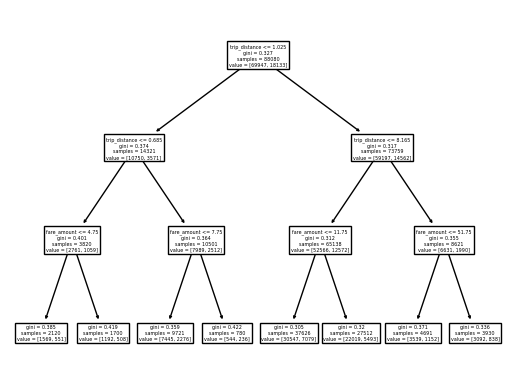

In [89]:
from sklearn.tree import plot_tree
plot_tree(tree, feature_names = ['trip_distance','fare_amount'])

## Step 11: Analysis of your choice

#### Perform any analysis on your data.  This could be a new type of analysis or repeat one of the previous project steps but on a different variable(s)

#### Random forests

In [91]:
rf = RandomForestClassifier(max_depth = 100, n_estimators = 1000)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=100, n_estimators=1000)

In [94]:
y_test_preds_rf = rf.predict(x_test)

In [96]:
confusion_matrix(y_test,y_test_preds_rf)

array([[16715,   749],
       [ 4354,   203]])

In [100]:
sensitivity = 203/(4354 + 203)
sensitivity

0.0445468509984639

In [102]:
specificity = 16715/(16715 + 749)
specificity

0.9571117727897389

#### Random forest model improved sensitivity but it has a lower specificity. The specificity is higher than the sensitivity, so the model does a better job predicting taxi trips' payment method not used for the passenger